In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# データを読み込む
データはKaggleからダウンロードできます。

[Kickstarter Projects](https://www.kaggle.com/kemical/kickstarter-projects)

In [2]:
df = pd.read_csv('ks-projects-201801.csv', nrows=30000)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df = df.drop(columns=['ID', 'name', 'deadline', 'goal', 'launched', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real'])
df.head()

,category,main_category,currency,state,country,usd_goal_real
0,Poetry,Publishing,GBP,failed,GB,1533.95
1,Narrative Film,Film & Video,USD,failed,US,30000.00
2,Narrative Film,Film & Video,USD,failed,US,45000.00
3,Music,Music,USD,failed,US,5000.00
4,Film & Video,Film & Video,USD,canceled,US,19500.00


# 欠損値の確認と処理
欠損値の確認には、isnull()やinfo()を使います。

In [4]:
df.isnull().sum()

category         0
main_category    0
currency         0
state            0
country          0
usd_goal_real    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
category         30000 non-null object
main_category    30000 non-null object
currency         30000 non-null object
state            30000 non-null object
country          30000 non-null object
usd_goal_real    30000 non-null float64
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


欠損値があった場合は、それをどう処理するかを考えます。

そのままにしておいても良い場合や、欠損していることを示すあらたなクラスを設ける場合、欠損値を含むデータを削除する場合や他の値で欠損値を補完する場合など、処理の方法はさまざまです。

In [6]:
# # 欠損していることを示すラベルをつける場合
# df['col'] = df['col'].fillna('XXX')

# # 欠損値を含むデータを削除する場合
# df = df.dropna()
# df = df.dropna(thresh=3)
# df = df[df['col'].isnull() == False]
# df = df.dropna(subset=['col'])

# # 他の値で補完する場合（最頻値）
# df = df.fillna(df['col'].mode()[0])

# カテゴリの数を確認する
カテゴリの数を確認するには、nunique()を使うと便利です。

さらに、value_counts()を使うと、それぞれのカテゴリにいくつのデータが属しているのかを確認できます。

In [7]:
df.nunique()

category          159
main_category      15
currency           14
state               6
country            23
usd_goal_real    7354
dtype: int64

In [8]:
df['category'].value_counts()

Product Design       1741
Documentary          1252
Music                1200
Tabletop Games       1131
Shorts               1001
Video Games           915
Food                  885
Film & Video          852
Fiction               728
Fashion               691
Nonfiction            683
Art                   655
Theater               563
Technology            542
Children's Books      538
Rock                  536
Apparel               521
Apps                  509
Photography           479
Indie Rock            469
Publishing            461
Webseries             444
Narrative Film        422
Comics                413
Web                   387
Country & Folk        338
Crafts                335
Design                313
Hip-Hop               306
Hardware              294
                     ... 
Space Exploration      23
Movie Theaters         23
Makerspaces            22
Civic Design           22
Animals                22
Literary Journals      21
Family                 20
Printing    

## それぞれのカテゴリの割合を計算する

In [9]:
success_rate = round(df['state'].value_counts() / len(df['state']), 2)
success_rate

failed        0.52
successful    0.36
canceled      0.10
undefined     0.01
live          0.01
suspended     0.00
Name: state, dtype: float64

# 円グラフで割合を可視化する

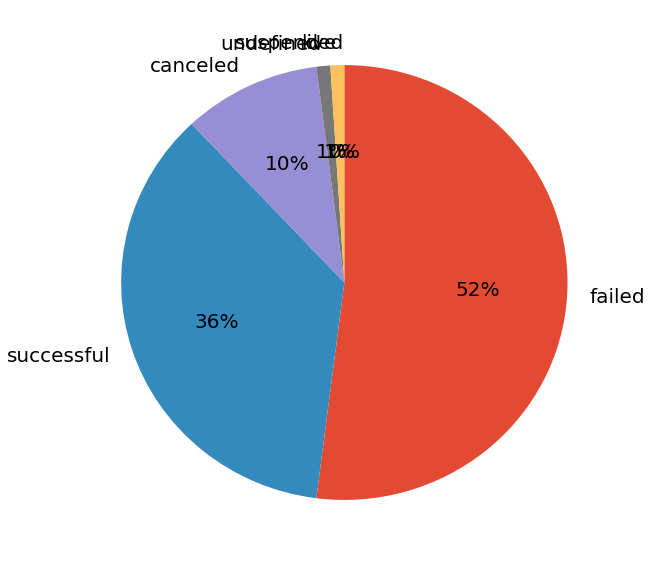

In [10]:
plt.figure(figsize=(10, 10))

plt.pie(success_rate, 
        labels=success_rate.index, 
        startangle=90, 
        autopct='%.0f%%', 
        textprops={'fontsize': 20},
        counterclock=False)

plt.show()

In [11]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [12]:
trace = go.Pie(labels=success_rate.index, 
               values=success_rate, 
               marker=dict(colors=['red']))

layout = go.Layout(title='Pie', 
                   legend=dict(orientation='h'))

data=[trace]
fig = go.Figure(data, layout=layout)
iplot(fig)

# 棒グラフでデータの件数を確認する

<BarContainer object of 15 artists>

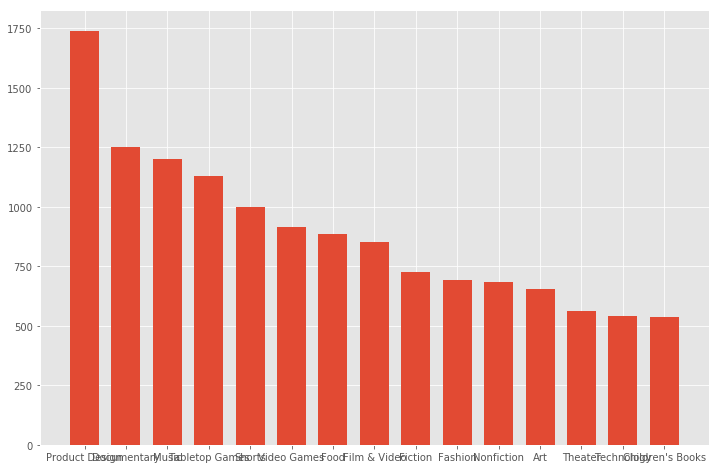

In [13]:
plt.figure(figsize=(12, 8))
plt.bar(x=df['category'].value_counts().index[:15],
        height=df['category'].value_counts()[:15],
        width=0.7)

In [14]:
trace = go.Bar(
    x=df['category'].value_counts().index,
    y=df['category'].value_counts(),
    name="Category"
)

layout = go.Layout(title='Bar', 
                   legend=dict(orientation='h'))

data=[trace]

fig = go.Figure(data, layout=layout)
iplot(fig)

# カテゴリごとの別のカテゴリにおける割合を計算
今回のデータセットの場合は、「カテゴリのごとの成功率」という値も重要な分析の対象になりそう。

In [15]:
category = df['main_category'].value_counts()
category

Film & Video    5088
Music           4082
Publishing      3170
Games           2810
Technology      2572
Design          2355
Art             2267
Food            1910
Fashion         1758
Photography      887
Theater          882
Comics           864
Crafts           714
Journalism       343
Dance            298
Name: main_category, dtype: int64

In [16]:
category_success = df[df['state'] == 'successful']['main_category'].value_counts()
category_success

Film & Video    1935
Music           1920
Games           1023
Publishing       951
Art              937
Design           807
Technology       555
Theater          531
Food             504
Comics           480
Fashion          442
Photography      273
Crafts           173
Dance            171
Journalism        71
Name: main_category, dtype: int64

In [17]:
category_success_rate = round(category_success / category, 2).sort_values(ascending=False)

In [18]:
trace = go.Bar(
    x=category_success_rate.index,
    y=category_success_rate,
    name="Category success rate"
)

layout = go.Layout(title='Bar', 
                   legend=dict(orientation='h'))

data=[trace]
fig = go.Figure(data, layout=layout)
iplot(fig)

# カテゴリごとに数値データを集計
カテゴリごとに数値データを集計するには、groupby()を使います。

In [19]:
df.groupby('main_category').sum()

,usd_goal_real
main_category,
Art,5.194188e+07
Comics,7.723597e+06
Crafts,4.958846e+06
Dance,3.044371e+06
Design,8.453469e+07
Fashion,2.496166e+07
Film & Video,2.448022e+08
Food,6.847047e+07
Games,7.630147e+07


## 棒グラフを描画

In [20]:
trace = go.Bar(
    x=df.groupby('main_category').sum().index,
    y=df.groupby('main_category').sum()['usd_goal_real'],
    name="usd_goal_real"
)

layout = go.Layout(title='Bar', 
                   legend=dict(orientation='h'))

data=[trace]
fig = go.Figure(data, layout=layout)
iplot(fig)

## 大きい順に表示する

In [21]:
groupby = df.groupby('main_category').sum().sort_values('usd_goal_real', ascending=False)

trace = go.Bar(
    x=groupby.index,
    y=groupby['usd_goal_real'],
    name="usd_goal_real"
)

layout = go.Layout(title='Bar', 
                   legend=dict(orientation='h'))

data=[trace]
fig = go.Figure(data, layout=layout)
iplot(fig)

## 箱ひげ図を描画

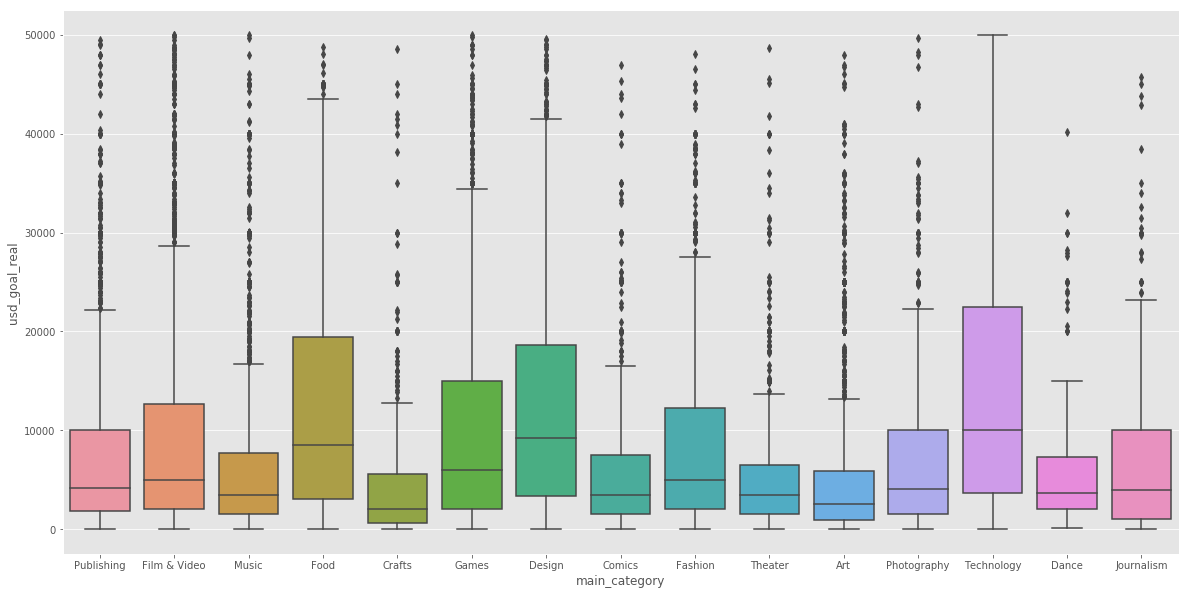

In [22]:
df = df[df['usd_goal_real'] < 50000]

plt.figure(figsize=(20, 10))
sns.boxplot(data=df, 
            x=df['main_category'], 
            y=df['usd_goal_real'])

# ダミー変数化
ダミー変数に変換する際は、pd.get_dummies()を使うと便利です。

drop_firstという引数をTrueにすると最初のダミーフラグを落としてくれます。

In [23]:
pd.get_dummies(df['currency']).head()

,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
pd.get_dummies(df['currency'], drop_first=True).head()

,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1


# カテゴリの集約
所属するデータがあまりにも少ないカテゴリを使って学習を行うと、過学習のリスクが高まります。

データの少ないカテゴリは、「その他」のようなカテゴリに集約してしまいましょう。

In [25]:
df['currency'].value_counts() 

USD    21171
GBP     2486
EUR     1190
CAD     1116
AUD      557
MXN      139
SEK      126
NZD       95
DKK       80
NOK       61
HKD       54
CHF       42
SGD       35
JPY        3
Name: currency, dtype: int64

AUD以下のカテゴリはデータ数が少ないことがわかります。よって、ここでは、これらを「Others」としてまとめます。

In [26]:
def others(currency):
    return np.where((currency == 'MXN') | (currency == 'SEK') | (currency == 'NZD') | (currency == 'DKK') |
                    (currency == 'NOK') | (currency == 'HKD') | (currency == 'CHF') | (currency == 'SGD') |
                    (currency == 'JPY'), 'Others', currency)

In [27]:
df['currency'] = others(df['currency'])
df['currency'].value_counts()

USD       21171
GBP        2486
EUR        1190
CAD        1116
Others      635
AUD         557
Name: currency, dtype: int64

# ラベル化
実際に機械学習のモデルに当てはめて学習を行うときは、文字列のデータを数値に変換してなくてはなりません。

その際は、sklearnのLabelEncoderを使うと便利です。

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
cat_features = ['category', 'main_category', 'currency', 'state', 'country']

for col in cat_features:
    lbl = LabelEncoder()
    df[col] = lbl.fit_transform(df[col].values)
    
df.head()

,category,main_category,currency,state,country,usd_goal_real
0,108,12,3,1,9,1533.95
1,93,6,5,1,22,30000.00
2,93,6,5,1,22,45000.00
3,90,10,5,1,22,5000.00
4,55,6,5,0,22,19500.00
